In [90]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data = pd.read_csv('parsedSurveyData.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   residence                                          344 non-null    object 
 1   program                                            344 non-null    object 
 2   rating                                             344 non-null    float64
 3   residence_Claudette Millar Hall (CMH)              344 non-null    int64  
 4   residence_Columbia Lake Village South (CLV-South)  344 non-null    int64  
 5   residence_Mackenzie King Village (MKV)             344 non-null    int64  
 6   residence_Ron Eydt Village (REV)                   344 non-null    int64  
 7   residence_UW Place (UWP)                           344 non-null    int64  
 8   residence_Village 1                                344 non-null    int64  
 9   extraversi

[0.9510940462778172, 2.6570473444764513, 9.930515595469798, 3.8270115485005514, 3.9846594972068945]
[0.7284450304399769, 1.1240223583641613, 2.629102714757997, 1.4896008355665564, 1.590814348997942]


/var/folders/gc/2hjqw94d0fg3h32mgnj49r7m0000gn/T/ipykernel_44451/1872548682.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['program'] = le.fit_transform(X['program'].values)
/var/folders/gc/2hjqw94d0fg3h32mgnj49r7m0000gn/T/ipykernel_44451/1872548682.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['program'] = le.fit_transform(X['program'].values)
/var/folders/gc/2hjqw94d0fg3h32mgnj49r7m0000gn/T/ipykernel_44451/1872548682.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of

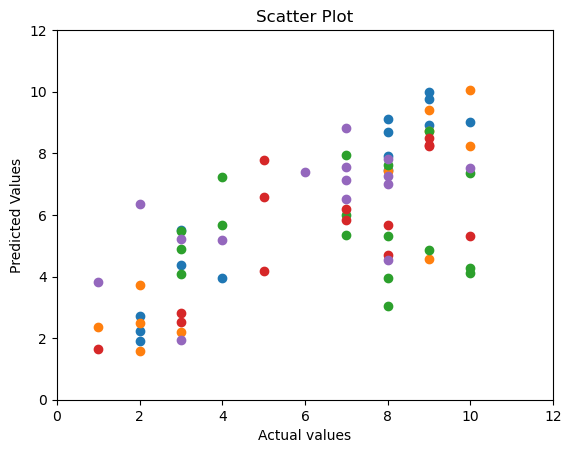

In [111]:
#Get all rows with specific residence
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

residence_list = ['residence_Claudette Millar Hall (CMH)', 
                  'residence_Mackenzie King Village (MKV)',
                  'residence_Ron Eydt Village (REV)', 
                  'residence_UW Place (UWP)', 
                  'residence_Village 1']

MSE_list = []
MAE_list = []

for residence in residence_list:
    residence_data = data[data[residence] == 1]
    X = residence_data[['program', 'extraversion', 'agreeableness', 'conscientiousness', 'emotionalStability', 'Openness']]
    y = residence_data['rating']
    
    # label encode program to values
    le = LabelEncoder() 
    X['program'] = le.fit_transform(X['program'].values) 
    X.head()
    
    #Fit Model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    
    plt.scatter(y_test, y_pred)
    plt.xlim([0,12])
    plt.ylim([0,12])
    plt.xlabel('Actual values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot')
    
    MAE_list.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_list.append(metrics.mean_squared_error(y_test, y_pred))
print(MSE_list)
print(MAE_list)

In [ ]:
user_data = 

def predict_user(user_data):
    